# NLP 與 LLM 核心概念與實作

## 前言
想像一下這個常見的場景：你剛在網路上買了一件期待已久的商品，於是你打開客服聊天機器人，輸入：「我的訂單什麼時候會到？」幾秒鐘後，機器人回覆：「正在為您查詢！請問您的訂單編號是？」。

這段看似簡單的對話，背後其實是**自然語言處理（Natural Language Processing, NLP）**這門強大技術在運作。電腦是如何從「我的訂單什麼時候會到？」這句充滿口語風格的話中，理解你的「意圖」是要查詢訂單狀態，而不是要退貨或客訴？

它需要辨識出「訂單」這個關鍵實體 (Entity Recognition)，甚至可能分析你的語氣是中性還是焦急 (Sentiment Analysis)，最後再生成一句通順且有幫助的回應 (Natural Language Generation) 。NLP 的核心目標，就是搭建一座橋樑，讓電腦能夠跨越人類語言與機器指令之間的鴻溝。  

這門課將帶你走過這座橋的建造歷程：從早期像是在沙礫中淘金的關鍵字比對，到能夠理解上下文語意的神經網路，最終深入探索當前最先進、如同擁有整座金山的大型語言模型。

What is NLP? https://www.youtube.com/watch?v=fLvJ8VdHLA0
NLP vs NLU vs NLG https://www.youtube.com/watch?v=1I6bQ12VxV0


In [2]:
# 安裝常用函式庫
#!pip install numpy pandas scikit-learn torch keras tensorflow gensim transformers
!pip install gensim
# 下載 NLTK 相關資源 (部分範例可能需要)
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

  Using cached FuzzyTM-2.0.9-py3-none-any.whl.metadata (7.9 kB)
  Using cached pyFUME-0.3.4-py3-none-any.whl.metadata (9.7 kB)
  Using cached simpful-2.12.0-py3-none-any.whl.metadata (4.8 kB)
  Using cached fst_pso-1.8.1-py3-none-any.whl
  Using cached pandas-1.5.3-cp311-cp311-win_amd64.whl.metadata (12 kB)
  Using cached miniful-0.0.6-py3-none-any.whl
Using cached FuzzyTM-2.0.9-py3-none-any.whl (31 kB)
Using cached pyFUME-0.3.4-py3-none-any.whl (60 kB)
Using cached pandas-1.5.3-cp311-cp311-win_amd64.whl (10.3 MB)
Using cached simpful-2.12.0-py3-none-any.whl (24 kB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:


ERROR: Could not install packages due to an OSError: [('c:\\users\\user\\anaconda3\\lib\\site-packages\\pandas\\tests\\arrays\\period\\__pycache__\\test_astype.cpython-311.pyc.2371867571536', 'C:\\Users\\User\\anaconda3\\Lib\\site-packages\\pandas\\tests\\arrays\\~eriod\\__pycache__\\test_astype.cpython-311.pyc.2371867571536', "[Errno 2] No such file or directory: 'c:\\\\users\\\\user\\\\anaconda3\\\\lib\\\\site-packages\\\\pandas\\\\tests\\\\arrays\\\\period\\\\__pycache__\\\\test_astype.cpython-311.pyc.2371867571536'")]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[n

True

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\User\\anaconda3\\Lib\\site-packages\\pandas-1.5.3.dist-info\\INSTALLER1sma3nzb.tmp'



     ---------------------------------------- 0.0/59.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/59.0 kB ? eta -:--:--
     ------------------- ------------------ 30.7/59.0 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 59.0/59.0 kB 624.8 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/60.3 kB ? eta -:--:--
   ---------------------------------------- 60.3/60.3 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
    --------------------------------------- 0.2/14.8 MB 7.3 MB/s eta 0:00:03
   - -------------------------------------- 0.5/14.8 MB 5.9 MB/s eta 0:00:03
   -- ------------------------------------- 1.0/14.8 MB 8.3 MB/s eta 0:00:02
   ----- ----------------------------------

# 文本預處理與向量化 (Text Preprocessing and Vectorization)
機器學習模型無法直接處理原始文本，我們需要先進行「清理」，然後再將文字轉換為數值向量。

# 基礎文本預處理
這是 NLP 任務的第一步，目的是去除噪音，並將文字標準化。

斷詞 (Tokenization): 將句子切分成詞語或標點符號等最小單元 。

停用詞移除 (Stop-word Removal): 移除像「的」、「是」、「在」這類常見但資訊量低的詞語 。

詞幹提取 (Stemming) 與詞形還原 (Lemmatization): 將詞語還原為其根本形式，例如將 "running", "ran" 都還原為 "run"。詞幹提取比較粗暴（直接砍掉字尾），詞形還原則會依據字典找出正確的原型詞 。

Colab 實作：使用 NLTK 進行文本預處理


In [3]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re

text = "Natural Language Processing is an exciting field, and I am learning its concepts."
sentences = sent_tokenize(text)
print("分句:", sentences)

# ## Regular Expressions
# # Remove punctuation characters
# text2 = re.sub(r"[^a-zA-Z0-9]", " ", sentences[0])
# text2


分句: ['Natural Language Processing is an exciting field, and I am learning its concepts.']


In [13]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re

text = "Machine Learning is a powerful technology, and I am exploring its applications. Deep Learning is fascinating, and I am studying how neural networks work. Artificial Intelligence is transforming industries, and I am eager to understand it better. Data Science is full of opportunities, and I am practicing its techniques.Computer Vision is an innovative field, and I am learning how machines interpret images. Reinforcement Learning is very interesting, and I am discovering how agents make decisions. Generative AI is a creative technology, and I am experimenting with its models.    Cloud Computing is essential today, and I am learning how to use it effectively.Big Data Analytics is valuable, and I am studying its tools and methods. Robotics is inspiring, and I am gaining knowledge about intelligent machines."
sentences = sent_tokenize(text)
print("分句:", sentences)

# ## Regular Expressions
# # Remove punctuation characters
# text2 = re.sub(r"[^a-zA-Z0-9]", " ", sentences[0])
# text2"

分句: ['Machine Learning is a powerful technology, and I am exploring its applications.', 'Deep Learning is fascinating, and I am studying how neural networks work.', 'Artificial Intelligence is transforming industries, and I am eager to understand it better.', 'Data Science is full of opportunities, and I am practicing its techniques.Computer Vision is an innovative field, and I am learning how machines interpret images.', 'Reinforcement Learning is very interesting, and I am discovering how agents make decisions.', 'Generative AI is a creative technology, and I am experimenting with its models.', 'Cloud Computing is essential today, and I am learning how to use it effectively.Big Data Analytics is valuable, and I am studying its tools and methods.', 'Robotics is inspiring, and I am gaining knowledge about intelligent machines.']


# 常用NLTK方法

In [7]:
# 1. 斷詞
tokens = word_tokenize(text.lower())
print("\n斷詞結果:", tokens)

# 2. 移除停用詞
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
print("\n移除停用詞後:", filtered_tokens)

# 3. 詞幹提取 (Stemming)
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
print("\n詞幹提取結果:", stemmed_tokens)

# 4. 詞形還原 (Lemmatization)
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
print("\n詞形還原結果:", lemmatized_tokens)




斷詞結果: ['natural', 'language', 'processing', 'is', 'an', 'exciting', 'field', 'that', 'combines', 'linguistics', ',', 'computer', 'science', ',', 'and', 'artificial', 'intelligence', ',', 'and', 'i', 'am', 'gradually', 'learning', 'its', 'fundamental', 'concepts', 'and', 'practical', 'applications', '.', 'machine', 'learning', 'is', 'a', 'fascinating', 'discipline', 'that', 'offers', 'endless', 'opportunities', 'for', 'innovation', ',', 'and', 'i', 'am', 'currently', 'exploring', 'its', 'principles', 'while', 'trying', 'to', 'understand', 'how', 'they', 'can', 'be', 'applied', 'in', 'real-world', 'problems', '.']

移除停用詞後: ['natural', 'language', 'processing', 'exciting', 'field', 'combines', 'linguistics', 'computer', 'science', 'artificial', 'intelligence', 'gradually', 'learning', 'fundamental', 'concepts', 'practical', 'applications', 'machine', 'learning', 'fascinating', 'discipline', 'offers', 'endless', 'opportunities', 'innovation', 'currently', 'exploring', 'principles', 'tryin

In [8]:
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [9]:
print(stopwords.words('chinese'))

['一', '一下', '一些', '一切', '一则', '一天', '一定', '一方面', '一旦', '一时', '一来', '一样', '一次', '一片', '一直', '一致', '一般', '一起', '一边', '一面', '万一', '上下', '上升', '上去', '上来', '上述', '上面', '下列', '下去', '下来', '下面', '不一', '不久', '不仅', '不会', '不但', '不光', '不单', '不变', '不只', '不可', '不同', '不够', '不如', '不得', '不怕', '不惟', '不成', '不拘', '不敢', '不断', '不是', '不比', '不然', '不特', '不独', '不管', '不能', '不要', '不论', '不足', '不过', '不问', '与', '与其', '与否', '与此同时', '专门', '且', '两者', '严格', '严重', '个', '个人', '个别', '中小', '中间', '丰富', '临', '为', '为主', '为了', '为什么', '为什麽', '为何', '为着', '主张', '主要', '举行', '乃', '乃至', '么', '之', '之一', '之前', '之后', '之後', '之所以', '之类', '乌乎', '乎', '乘', '也', '也好', '也是', '也罢', '了', '了解', '争取', '于', '于是', '于是乎', '云云', '互相', '产生', '人们', '人家', '什么', '什么样', '什麽', '今后', '今天', '今年', '今後', '仍然', '从', '从事', '从而', '他', '他人', '他们', '他的', '代替', '以', '以上', '以下', '以为', '以便', '以免', '以前', '以及', '以后', '以外', '以後', '以来', '以至', '以至于', '以致', '们', '任', '任何', '任凭', '任务', '企图', '伟大', '似乎', '似的', '但', '但是', '何', '何况', '何处', '何时', '作为', '你', '你们', '你的', '使得', '使用'

# 綜合預處理流水線

In [10]:
import re
from collections import Counter

class TextPreprocessor:
    def __init__(self, language='en'):
        self.language = language
        if language == 'en':
            from nltk.corpus import stopwords
            from nltk.stem import WordNetLemmatizer
            self.stop_words = set(stopwords.words('english'))
            self.lemmatizer = WordNetLemmatizer()
        else:
            import jieba
            self.stop_words = {"的", "是", "在", "有", "和", "與", "了", "等"}

    def clean_text(self, text):
        """基本清理：移除 URL、郵箱、多餘空格"""
        text = re.sub(r'http[s]?://\S+', '', text)
        text = re.sub(r'\S+@\S+', '', text)
        text = re.sub(r'\s+', ' ', text)
        return text.strip()

    def preprocess(self, text):
        """完整預處理流程"""
        # 1. 清理
        cleaned = self.clean_text(text)

        # 2. 分詞
        if self.language == 'en':
            from nltk.tokenize import word_tokenize
            tokens = word_tokenize(cleaned.lower())
            tokens = [t for t in tokens if t.isalpha()]
        else:
            import jieba
            tokens = list(jieba.cut(cleaned))

        # 3. 移除停用詞
        filtered = [t for t in tokens if t not in self.stop_words]

        # 4. 詞形還原（僅英文）
        if self.language == 'en' and hasattr(self, 'lemmatizer'):
            filtered = [self.lemmatizer.lemmatize(t) for t in filtered]

        return {
            'original': text,
            'cleaned': cleaned,
            'tokens': tokens,
            'filtered': filtered,
            'word_count': len(filtered),
            'vocab_size': len(set(filtered))
        }

# 使用範例
preprocessor = TextPreprocessor('en')
result = preprocessor.preprocess(
    "Natural Language Processing is exciting! I'm learning NLP concepts."
)

for key, value in result.items():
    print(f"{key}: {value}")


original: Natural Language Processing is exciting! I'm learning NLP concepts.
cleaned: Natural Language Processing is exciting! I'm learning NLP concepts.
tokens: ['natural', 'language', 'processing', 'is', 'exciting', 'i', 'learning', 'nlp', 'concepts']
filtered: ['natural', 'language', 'processing', 'exciting', 'learning', 'nlp', 'concept']
word_count: 7
vocab_size: 7


## TF-IDF：統計驅動的文本表示

TF-IDF（詞頻-逆文件頻率）是一種統計方法，用於評估一個詞對於一份文件集或一個語料庫中的其中一份文件的重要程度。其主要思想是，如果某個詞在一篇文章中出現的頻率高，並且在其他文章中很少出現，則認為此詞語具有很好的類別區分能力。

## Colab 實作：使用 Scikit-learn 計算 TF-IDF




In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# 範例語料

documents = [
    "Machine learning is the core of artificial intelligence",
    "Deep learning is a subfield of machine learning",
    "Natural language processing uses machine learning techniques",
    "Computer vision is also an important branch of artificial intelligence"
]

# documents = [
#       "機器學習是人工智慧的核心",
#       "深度學習是機器學習的子領域",
#       "自然語言處理使用機器學習技術",
#       "電腦視覺也是人工智慧的重要分支"
# ]


In [14]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)
# 查看特徵詞彙
feature_names = vectorizer.get_feature_names_out()
print("詞彙表:", feature_names)
print("TF-IDF矩陣形狀:", tfidf_matrix.shape)


詞彙表: ['also' 'an' 'artificial' 'branch' 'computer' 'core' 'deep' 'important'
 'intelligence' 'is' 'language' 'learning' 'machine' 'natural' 'of'
 'processing' 'subfield' 'techniques' 'the' 'uses' 'vision']
TF-IDF矩陣形狀: (4, 21)


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 27284 (\N{CJK UNIFIED IDEOGRAPH-6A94}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27402 (\N{CJK UNIFIED IDEOGRAPH-6B0A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29105 (\N{CJK UNIFIED IDEOGRAPH-71B1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packa

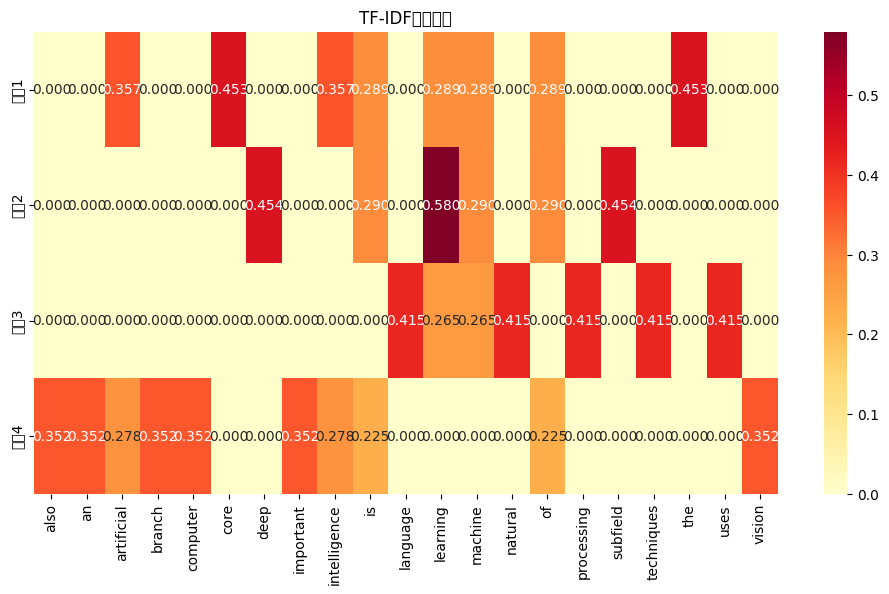

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 轉換為密集矩陣並建立DataFrame
tfidf_dense = tfidf_matrix.todense()
df = pd.DataFrame(tfidf_dense,
                  columns=feature_names,
                  index=[f"文檔{i+1}" for i in range(len(documents))])

# 視覺化熱圖
plt.figure(figsize=(12, 6))
sns.heatmap(df, annot=True, cmap='YlOrRd', fmt='.3f')
plt.title('TF-IDF權重熱圖')
plt.show()


## 詞嵌入 (Embeddings)

TF-IDF 雖然實用，但無法捕捉詞語之間的語意關係。Word2Vec 等詞嵌入技術透過學習詞語的上下文，將每個詞語映射到一個低維度的密集向量（dense vector）。在向量空間中，語意相近的詞語其向量也較為接近。

## Colab 實作：使用 Gensim 訓練 Word2Vec 模型


In [15]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# 範例句子 (需要先分詞)
sentences = [
    "king is a strong man",
    "queen is a wise woman",
    "boy is a young man",
    "girl is a young woman",
    "prince is a young king",
    "princess is a young queen",
    "man is strong",
    "woman is beautiful",
    "prince is a boy will be king",
    "princess is a girl will be queen"
]

tokenized_sentences = [word_tokenize(s.lower()) for s in sentences]

# 訓練 Word2Vec 模型
# vector_size: 向量維度, window: 上下文窗口大小, min_count: 忽略頻率低於此值的詞
model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

# 尋找與 'king' 最相似的詞
try:
    similar_words = model.wv.most_similar('king')
    print("與 'king' 最相似的詞:", similar_words)

    # 進行向量運算：king - man + woman ≈ queen
    result = model.wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)
    print("\nking - man + woman ≈", result)
except KeyError as e:
    print(f"錯誤: {e} - 詞彙不在模型詞典中。")

與 'king' 最相似的詞: [('young', 0.14589907228946686), ('prince', 0.050987161695957184), ('woman', 0.041490815579891205), ('queen', 0.03506026044487953), ('man', 0.019071081653237343), ('is', 0.017002152279019356), ('strong', 0.012797852978110313), ('will', 0.008779439143836498), ('beautiful', 0.007796592079102993), ('be', 0.005828024819493294)]

king - man + woman ≈ [('beautiful', 0.17699821293354034)]


In [9]:
from gensim.models import Word2Vec
import jieba

# 準備中文語料
def preprocess_chinese(text):
    return list(jieba.cut(text))

# 訓練數據準備
sentences = [
    preprocess_chinese("機器學習是人工智慧的重要分支"),
    preprocess_chinese("深度學習使用神經網路學習表示"),
    preprocess_chinese("自然語言處理分析文本語意"),
    # ... 更多句子
]

# 訓練Word2Vec模型
model = Word2Vec(sentences,
                 vector_size=100,    # 向量維度
                 window=5,           # 上下文窗口
                 min_count=1,        # 最小詞頻
                 workers=4,          # 並行度
                 sg=1)               # Skip-gram

# 保存模型
model.save("word2vec_chinese.model")


Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.001 seconds.
DEBUG:jieba:Loading model cost 1.001 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


In [16]:
# 查找相似詞
similar_words = model.wv.most_similar('人工智慧', topn=5)
print("與'人工智慧'最相似的詞:", similar_words)

# 詞彙運算
result = model.wv.most_similar(
    positive=['國王', '女人'],
    negative=['男人'],
    topn=1
)
print("國王 - 男人 + 女人 =", result)

# 計算相似度
similarity = model.wv.similarity('電腦', '計算機')
print(f"'電腦'與'計算機'的相似度: {similarity:.4f}")

KeyError: "Key '人工智慧' not present in vocabulary"

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32173 (\N{CJK UNIFIED IDEOGRAPH-7DAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35422 (\N{CJK UNIFIED IDEOGRAPH-8A5E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23884 (\N{CJK UNIFIED IDEOGRAPH-5D4C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20837 (\N{CJK UNIFIED IDEOGRAPH-5165}) missing from font(s) DejaVu Sans.
  fig.canvas

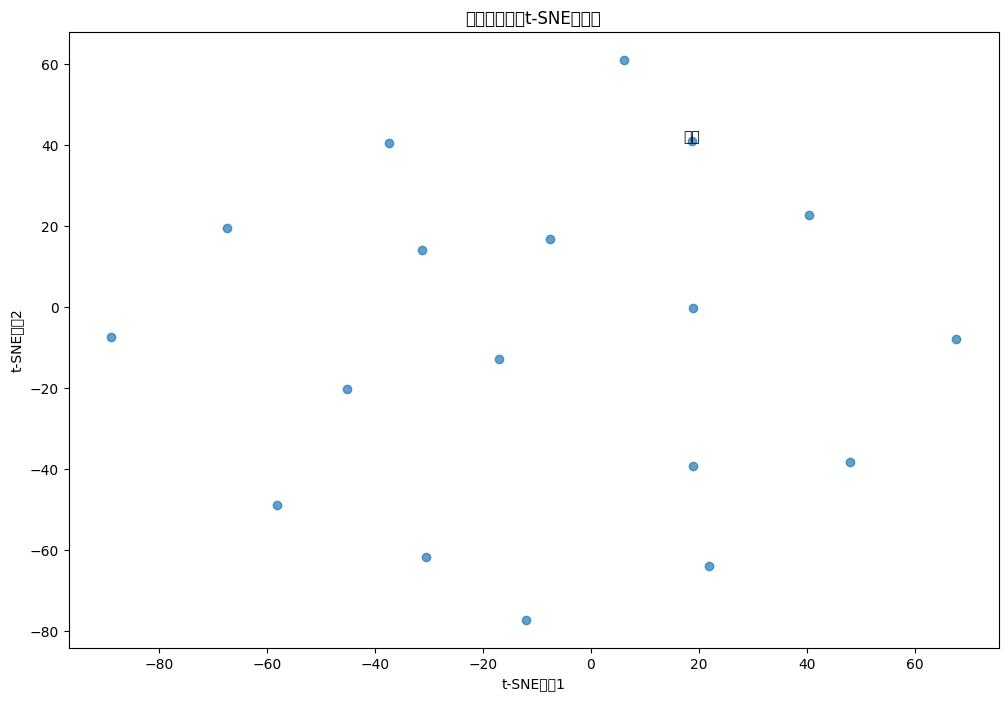

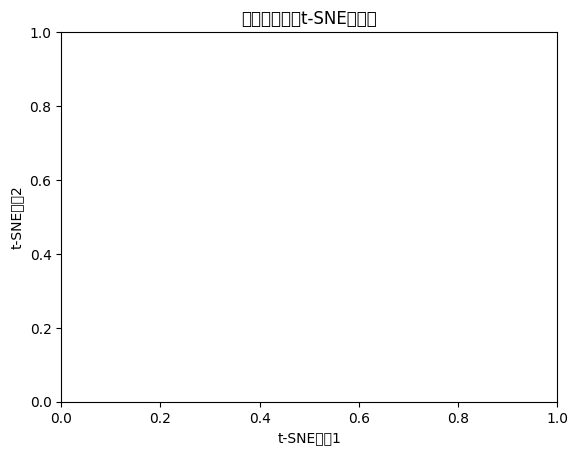

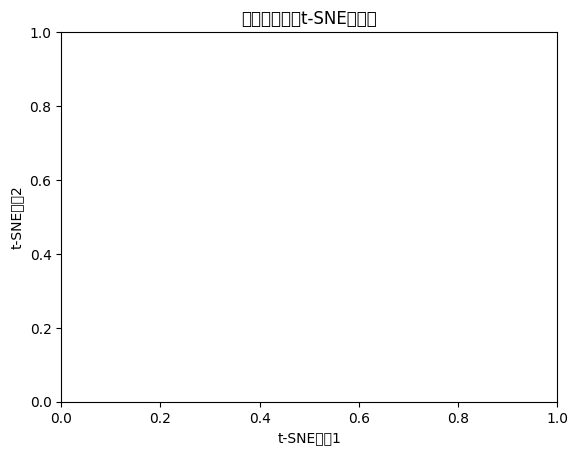

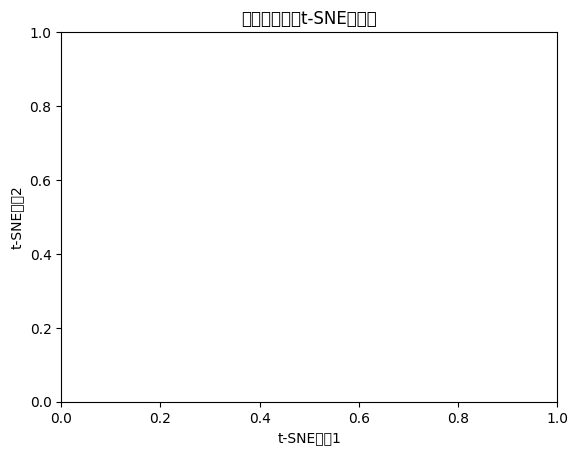

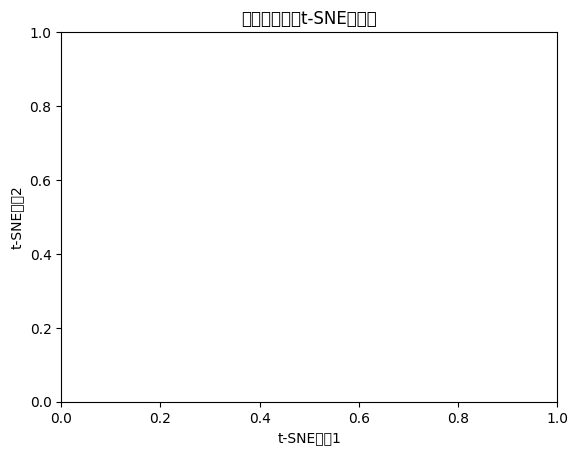

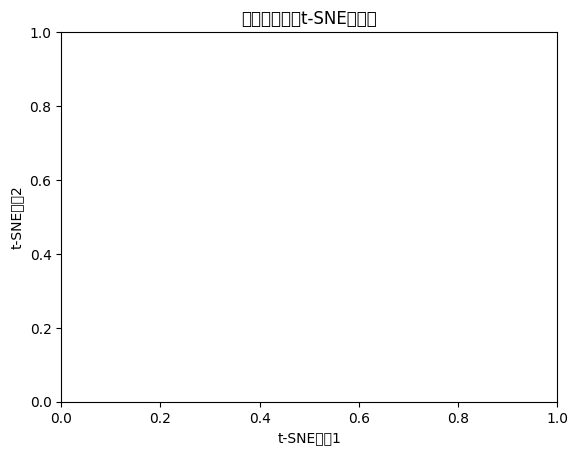

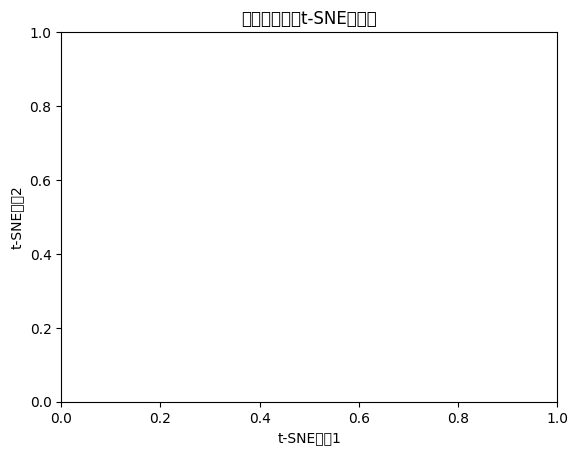

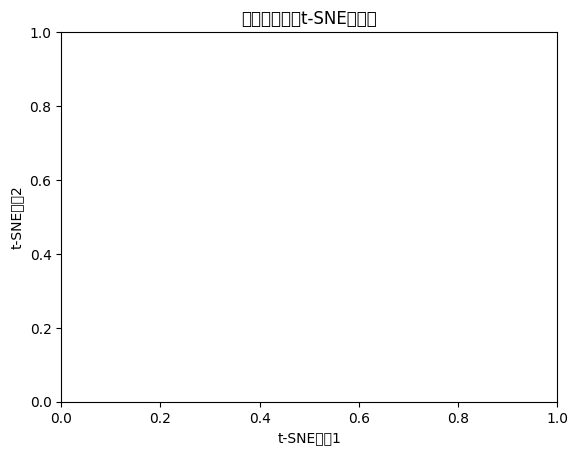

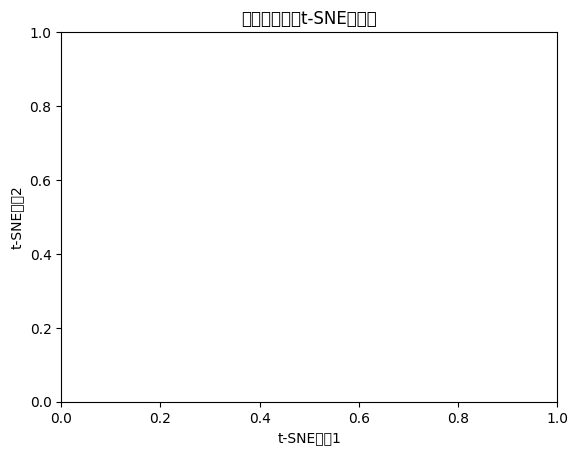

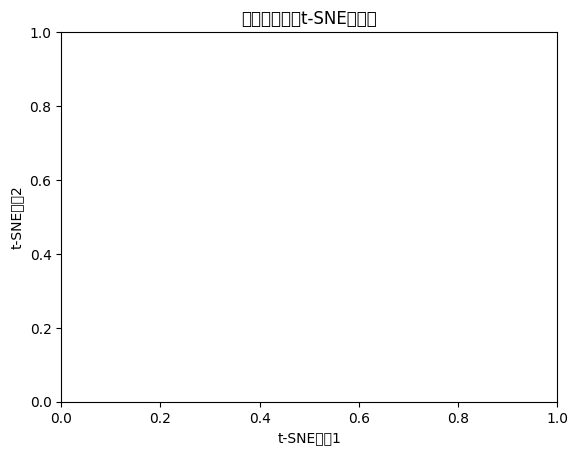

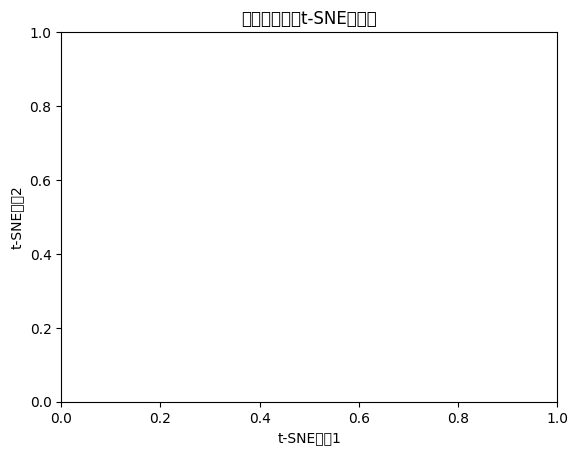

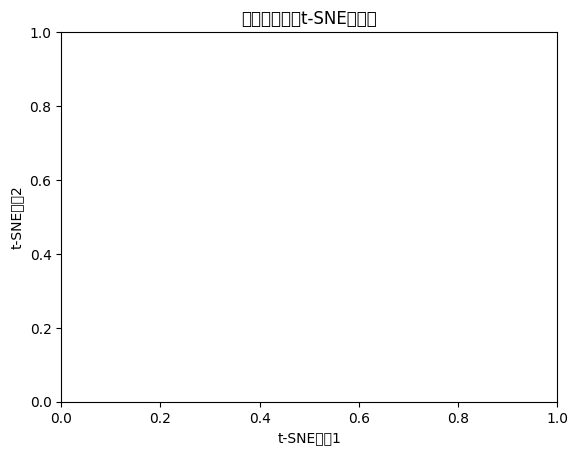

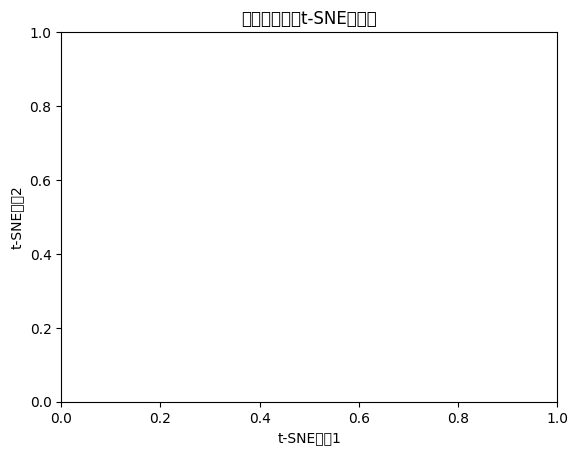

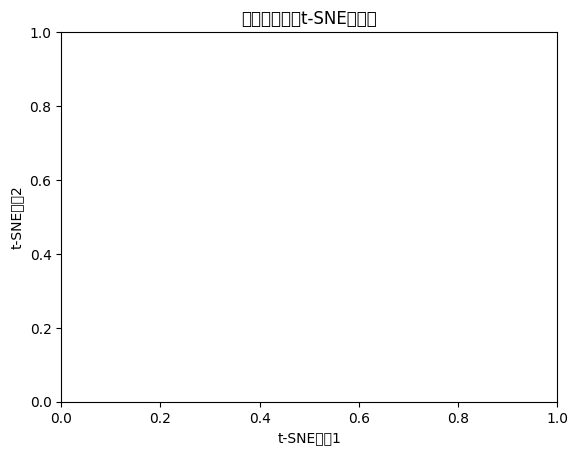

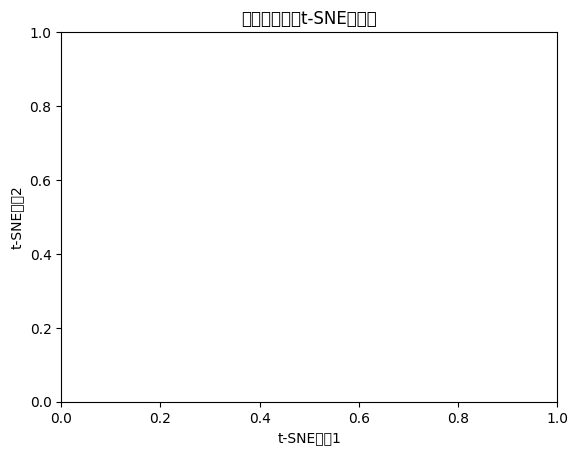

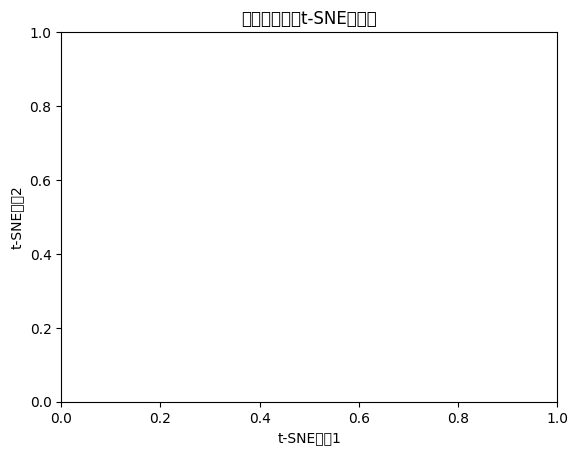

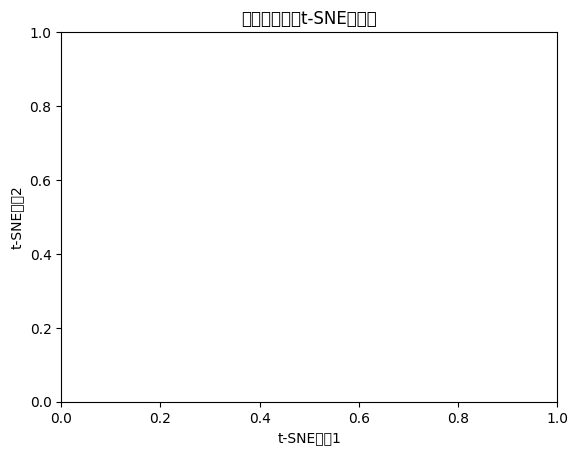

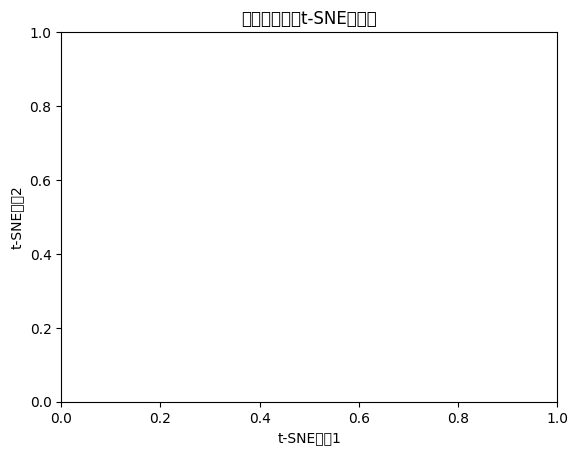

In [15]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# 提取詞向量
words = list(model.wv.key_to_index.keys())[:50]  # 取前50個詞
word_vectors = np.array([model.wv[word] for word in words])

# t-SNE降維
tsne = TSNE(n_components=2, random_state=42, perplexity=10)
word_vectors_2d = tsne.fit_transform(word_vectors)

# 繪製散點圖
plt.figure(figsize=(12, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], alpha=0.7)

# 標註詞彙
for i, word in enumerate(words):
    plt.annotate(word,
                (word_vectors_2d[i, 0], word_vectors_2d[i, 1]),
                fontsize=10, ha='center')

    plt.title('詞嵌入向量的t-SNE視覺化')
    plt.xlabel('t-SNE維度1')
    plt.ylabel('t-SNE維度2')
    plt.show()
